In [34]:
from coefficients import _b
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt

key = random.PRNGKey(758493)

In [35]:
### Generate random samples such that a_1 a_2 a_3 = 1

u = random.exponential(key, shape=(3, 1000))

a = jnp.array([u[0] / u[1], u[1] / u[2], u[2] / u[0]]).T.sort(axis=1, descending=True)
a

Array([[5.2356033e+00, 3.8760331e+00, 4.9277175e-02],
       [3.1915777e+00, 9.2327166e-01, 3.3936346e-01],
       [1.8652603e+01, 3.7342367e-01, 1.4356835e-01],
       ...,
       [2.1786030e+01, 6.1514980e-01, 7.4617550e-02],
       [2.3437048e+01, 5.0720625e+00, 8.4122568e-03],
       [1.0492832e+01, 1.4157116e+00, 6.7318194e-02]], dtype=float32)

In [36]:
E = (1 / 2) * jnp.linalg.norm(a, axis=1) ** 2
dE = jnp.sum(a * jnp.array([_b(row) for row in a]), axis=1)

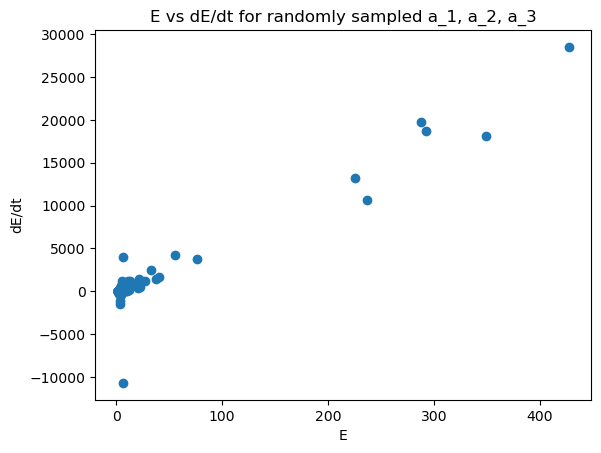

In [41]:
plt.figure()
plt.scatter(E, dE)
plt.xlabel("E")
plt.ylabel("dE/dt")
plt.title("E vs dE/dt for randomly sampled a_1, a_2, a_3")
plt.show()

In [38]:
dE

Array([            nan,             nan,             nan,             nan,
                   nan,  4.51690376e-01,  6.91393127e+01, -1.09303055e+02,
                   nan,             nan, -1.68826790e+01,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        8.34466362e+00,             nan,             nan,             nan,
       -1.89065325e+00,             nan,             nan, -4.82474267e-01,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,  6.99155045e+01,
                   nan,             nan,             nan,  4.00817383e+03,
                   nan,  2.24024534e+00,             nan,             nan,
                   nan,             nan,             nan,  2.73870728e+02,
                   nan,  

### Break to investigate why we are getting all these nans

In [45]:
_b(a[0])

Array([nan, nan, nan], dtype=float32)

In [39]:
### Fit linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [40]:
model.fit(jnp.log(E).reshape(-1, 1), jnp.log(dE))

ValueError: Input y contains NaN.